In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

# 1.讀入 Fashion MNSIT 數據集

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 2.欣賞數據集內容

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Sneaker


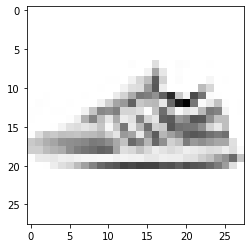

In [10]:
n = 5567
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

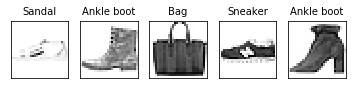

In [11]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')

# 3.資料整理

In [13]:
x_train=x_train/255
x_test=x_test/255
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_train,10)

# 打造神經網路

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [40]:
models=Sequential()
models.add(Dense(100,input_dim=784,activation='relu'))
models.add(Dense(100,activation='relu'))
models.add(Dense(100,activation='relu'))
models.add(Dense(10,activation='softmax'))

# 4.組裝我們的神經網路

In [41]:
models.compile(loss='mse',optimizer=SGD(lr=0.1),metrics=['accuracy'])

In [42]:
models.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


# 5. 訓練

In [43]:
models.fit(x_train, y_train, batch_size=20, epochs=40)

Train on 60000 samples
Epoch 1/40
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0411 - accuracy: 0.7185
Epoch 2/40
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0256 - accuracy: 0.8256 - loss: 0.0258 - 
Epoch 3/40
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0230 - accuracy: 0.8419
Epoch 4/40
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0215 - accuracy: 0.8529
Epoch 5/40
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0205 - accuracy: 0.8598
Epoch 6/40
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0197 - accuracy: 0.8645
Epoch 7/40
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0190 - accuracy: 0.8703
Epoch 8/40
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0184 - accuracy: 0.8739
Epoch 9/40
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0179 - accu

In [45]:
result = models.predict_classes(x_test)

這是 Sandal


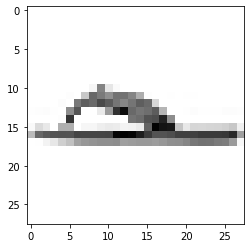

In [50]:
n = 567
print('這是', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')

修改的地方：

In [51]:
#調整隱藏層數
#調整神經元數
# 調高learning rate
# 調低batch_size
# 調高epochs